In [48]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import csv

In [49]:
csv = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
hispanic_suicides_df = pd.read_csv(csv)

In [50]:
def create_ethnicity_column(stub_label):
    try:
        splits = stub_label.split(': ')
        if splits[0] in ['Male', 'Female']:
            return splits[1]
        else:
            return splits[0]
    except:
        return "FAILED"
    
def gender(stub_label):
    try:
        splits = stub_label.split(': ')
        if splits[0] in ['Male', 'Female']:
            return splits[0]
        else:
            return "FAILED"
    except:
        return "FAILED"

    
hispanic_suicides_df['Gender'] = hispanic_suicides_df['STUB_LABEL'].apply(gender)

hispanic_suicides_df['ETHNICITY'] = hispanic_suicides_df['STUB_LABEL'].apply(create_ethnicity_column)

hispanics_df = hispanic_suicides_df.loc[hispanic_suicides_df["ETHNICITY"] == "Hispanic or Latino"]
hispanics_df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Gender,ETHNICITY
546,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1950,1,All ages,0.0,NaN,...,Male,Hispanic or Latino
547,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1960,2,All ages,0.0,NaN,...,Male,Hispanic or Latino
548,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1970,3,All ages,0.0,NaN,...,Male,Hispanic or Latino
549,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1980,4,All ages,0.0,NaN,...,Male,Hispanic or Latino
550,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1981,5,All ages,0.0,NaN,...,Male,Hispanic or Latino


In [51]:
mask = (hispanics_df['YEAR'] > 1980) & (hispanics_df['YEAR'] <= 2018)
filtered_hispanics_df = hispanics_df.loc[mask]
filtered_hispanics_df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Gender,ETHNICITY
550,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1981,5,All ages,0.0,NaN,...,Male,Hispanic or Latino
551,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1982,6,All ages,0.0,NaN,...,Male,Hispanic or Latino
552,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1983,7,All ages,0.0,NaN,...,Male,Hispanic or Latino
553,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1984,8,All ages,0.0,NaN,...,Male,Hispanic or Latino
554,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,6,Male: Hispanic or Latino: All races,6.13,1985,9,All ages,0.0,11.0,NaN,Male,Hispanic or Latino


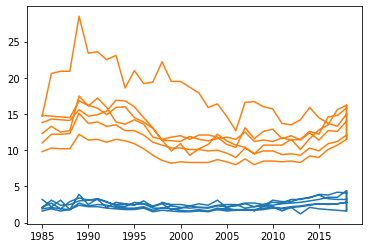

In [52]:
groups = filtered_hispanics_df.groupby('Gender')
for name, group in groups:
    plt.plot(group['YEAR'], group['ESTIMATE'])

Text(0, 0.5, 'Deaths per 100,000')

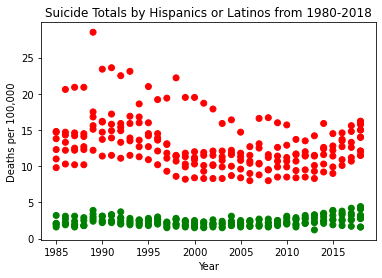

In [53]:
colors = {'Male':'red', 'Female':'green'}
plt.scatter(filtered_hispanics_df['YEAR'], filtered_hispanics_df['ESTIMATE'], c=filtered_hispanics_df['Gender'].map(colors))
plt.title("Suicide Totals by Hispanics or Latinos from 1980-2018")
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000")